#**Lab 3: Analyzing Data in Python**

# RPAD 676: Data Science for the Public Good

## Author:
## Date:

## Instructions
In this assignment, you will conduct your own analysis using the provided dataset. Follow the prompts in each section and write the necessary Python code to complete the tasks.

**Tasks:**
- Load and explore the dataset
- Perform basic data cleaning (handling missing values, etc.)
- Generate descriptive statistics
- Create at least one meaningful visualization
- Summarize key insights from your analysis

Remember to document your thought process in markdown cells throughout the notebook.

In [3]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with actual file path)
data = pd.read_csv('digital_services_data.csv')

# Display the first few rows
data.head()

,user_id,TimeTaken,UserSatisfaction,Age,DisabilityStatus,DigitalLiteracy,Gender,EmploymentStatus,EducationLevel,InternetAccess,ErrorRates,RequestedHelp,SatisfactionOtherServices,WillingnessFutureUse,ReceivesSocialServices,Agency
0,2,919,4,38,0,5,Female,Retired,Some College,Broadband,1,0,6,10,0,Department of Health and Human Services
1,9,759,10,78,0,5,Male,Employed,High School,Broadband,1,0,3,8,0,Department of Public Safety
2,13,853,8,45,0,3,Female,Unemployed,Bachelor,Broadband,2,0,6,10,0,Department of Education
3,15,503,4,66,0,3,Male,Student,Bachelor,Broadband,1,0,2,1,0,Department of Public Safety
4,25,857,7,69,0,1,Female,Employed,Some College,Mobile Data,4,0,3,1,0,Department of Education


## Descriptive Statistics

Compute and interpret basic statistics for the dataset:
- Mean, median, mode
- Standard deviation, min, max
- Any other relevant metrics

_Write your code below:_

In [4]:
# Displaying descriptive statistics for all numerical columns
numeric_cols = data.select_dtypes(include=['number']).columns
descriptive_stats = data.describe().round(2)
print("Descriptive Statistics for Numeric Variables:")
print(descriptive_stats)

Descriptive Statistics for Numeric Variables:
       user_id  TimeTaken  UserSatisfaction      Age  DisabilityStatus  \
count  1000.00    1000.00           1000.00  1000.00           1000.00   
mean    500.50    1059.03              4.95    49.04              0.15   
std     288.82     344.67              2.90    17.89              0.36   
min       1.00       0.00              1.00    18.00              0.00   
25%     250.75     830.50              2.00    34.00              0.00   
50%     500.50    1064.00              5.00    50.00              0.00   
75%     750.25    1274.00              7.00    64.00              0.00   
max    1000.00    2136.00             10.00    79.00              1.00   

       DigitalLiteracy  ErrorRates  RequestedHelp  SatisfactionOtherServices  \
count          1000.00     1000.00        1000.00                    1000.00   
mean              3.05        2.39           0.29                       5.61   
std               1.40        2.38           0.

## Data Visualization

Create at least one visualization that highlights an interesting aspect of the dataset. You may use bar plots, histograms, scatter plots, or other relevant charts.

_Write your code below:_

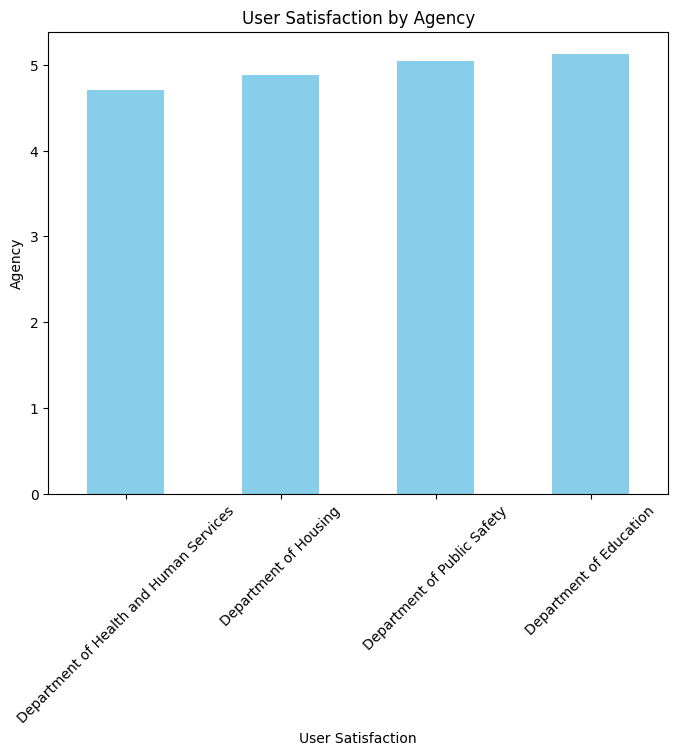

In [21]:
# Visualizing User Satisfaction by Agency in a Bar Graph
data.groupby('Agency')['UserSatisfaction'].mean().sort_values().plot(kind='bar', color='skyblue', figsize=(8,6))
plt.xlabel("User Satisfaction")
plt.ylabel("Agency")
plt.title("User Satisfaction by Agency")
plt.xticks(rotation=45)
plt.show()

## Inferential Statistics

### T-Tests
Compare means across two groups using the t-test. Calculate the means, conduct the t-test, and summarize the findings and what they say about the relationship between the variables.

_Write your code below:_

In [16]:
#Calculate the % of users who requested help based on whether they receive social services

outcome_variable = 'UserSatisfaction'
categorical_variable = 'ReceivesSocialServices'
specific_grouped_means = data.groupby(categorical_variable)[outcome_variable].mean().round(2)

print(f"\nMean of {outcome_variable} grouped by {categorical_variable}:")
print(specific_grouped_means)


Mean of UserSatisfaction grouped by ReceivesSocialServices:
ReceivesSocialServices
0    5.28
1    4.74
Name: UserSatisfaction, dtype: float64


In [6]:
# Import stats packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [18]:
# T-Test: Comparing means across two groups

t_stat, p_val = stats.ttest_ind(
    data[data['ReceivesSocialServices'] == 1]['UserSatisfaction'],
    data[data['ReceivesSocialServices'] == 0]['UserSatisfaction']
)
print(f"T-test: Effect of receiving social services on user satisfaction, t-statistic={t_stat:.4f}, p-value={p_val:.4f}")

T-test: Effect of receiving social services on user satisfaction, t-statistic=-2.8730, p-value=0.0042


### ANOVA
Compare means across two groups using the t-test. Calculate the means, conduct the t-test, and summarize the findings and what they say about the relationship between the variables.

_Write your code below:_

In [20]:
# Calculate the mean of User Satisfaction by Agency

outcome_variable = 'UserSatisfaction'  # Change to the variable of interest
categorical_variable = 'Agency'  # Change to the desired categorical variable

specific_grouped_means = data.groupby(categorical_variable)[outcome_variable].mean().round(2)
print(f"\nMean of {outcome_variable} grouped by {categorical_variable}:")
print(specific_grouped_means)

# ANOVA: Comparing user satisfaction across agencies

aov = smf.ols(f'{outcome_variable} ~ C({categorical_variable})', data=data).fit()
anova_table = sm.stats.anova_lm(aov, typ=2)

print("\nANOVA Results:")
print(anova_table)

# Conduct post hoc test (Tukey HSD) if ANOVA is significant

alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("\nANOVA is significant. Conducting post hoc Tukey HSD test:")
    tukey_results = pairwise_tukeyhsd(endog=data[outcome_variable], groups=data[categorical_variable], alpha=alpha)
    print(tukey_results)
else:
    print("\nANOVA is not significant. No post hoc test needed.")


Mean of UserSatisfaction grouped by Agency:
Agency
Department of Education                    5.13
Department of Health and Human Services    4.70
Department of Housing                      4.88
Department of Public Safety                5.04
Name: UserSatisfaction, dtype: float64

ANOVA Results:
                sum_sq     df         F    PR(>F)
C(Agency)    25.144653    3.0  0.995716  0.394072
Residual   8383.939347  996.0       NaN       NaN

ANOVA is not significant. No post hoc test needed.


<ipython-input-20-3077e5ca7ee2>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < alpha:


## Key Insights

Summarize your findings in a short paragraph. What patterns or trends did you observe? Were there any surprises in the data? How might these insights be useful?

_Write your response below:

### *Response*

*I evaluated user satisfaction for completing the forms based on the agency and users' previous receipt of social services.*


*This bar graph shows the average user satisfaction, on a scale of 1-10, per agency. An initial look at the data and bar graph show differences in user satisfaction based on agency. However, when I conducted ANOVA testing with these two variables, the mean difference between all group was found to be not statistically significant (p > 0.05)*


*Looking at the relationship between the receipt of previous social services and user satisfaction, a t-test analysis shows a statistically significant relationship (p < 0.05). On average, those who have not previously received social services have, on average, a user satisfaction of 5.28/10, while those who have not previously received social services have on average 4.74*

*The prescense of a statistically significant relationship between the receipt of social services and user satisfaction indicates that a multiple regression analysis between user satisfaction and agency, controlling for the receipt of social services, may provide new insights beyond this analysis.*

*However, for all user satisfaction scores, irrespective of their relationships or lack thereof when comparing different agencies, there is much room for improvement. Even the highest average score, a 5.13/10 for the Department of Education, and the distribution for all user satisfaction scores appears relatively normalized across the entire scale of 1-10. This indicates a wide variation in user satisfaction over the total population of users, plus a relatively undesirable mean score overall. Additional data collection, analysis, or qualitative research would be valuable to help identify which groups may have less satisfaction with these services, and why that might be the case. By addressing the barriers and problems these groups encountered, the average user satisfaction among all agencies could be potentially increased.*
